In [97]:
import pandas as pd
import numpy as np

In [98]:
d1 = pd.read_csv("/content/flabel12.csv")
d2 = pd.read_csv("/content/dataairport1.csv")
d3 = pd.read_csv("/content/datachruch1.csv")
d4 = pd.read_csv("/content/datahospital1.csv")
d5 = pd.read_csv("/content/datarestaurant.csv")
d6 = pd.read_csv("/content/datazoo1.csv")

In [99]:
data = pd.concat([d1,d3,d4,d5,d6])
data.shape

(131625, 5)

In [100]:
data.drop_duplicates(subset=['Tweet'], inplace = True)
print("No of Unique tweets: ", data['Tweet'].count())

No of Unique tweets:  129715


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'The distribution of Tweets')

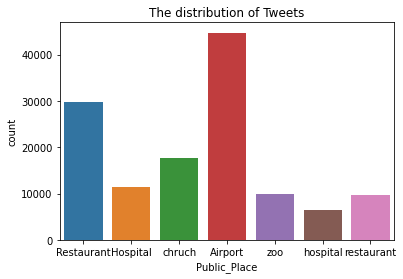

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6,4))
sns.countplot(data['Public_Place'])
plt.title("The distribution of Tweets")

In [102]:
data.sample(5)

,Time,Username,Tweet,Label,Public_Place
36235,2014-01-09 17:19:36+00:00,JimiFifth,I'm at UH Seidman Cancer Center - @uhhospitals...,2,Hospital
10329,2022-07-27 00:57:21+00:00,WilsonTobs,🚨UPDATE ALERT🚨 Sammy Sass with a 3 run HOMERUN...,1,Restaurant
18251,2019-06-12 18:47:08+00:00,TacoLover_DM,"I'm at @SUBWAY in Bourbonnais, IL https://t.co...",1,Restaurant
4748,2023-02-10 08:01:58+00:00,Food_DrinkWales,🚨 Warning 🚨\nOnly 5 Fridays remain to enter Th...,1,restaurant
55569,2019-02-16 16:17:31+00:00,PrettyGlobal23,I'm at Hartsfield-Jackson Atlanta Internationa...,0,Airport


In [103]:
import nltk
import re, string
from nltk.corpus import stopwords
nltk.download('stopwords')
stopword = stopwords.words('english')
print("Stopwords:",stopword)

Stopwords: ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so'

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [104]:
def clean(text):
    text = text.lower() # lower case
    text = re.sub(r'https?://\S+|www\.\S+', " ", text)#URL
    text = re.sub(r'@\w+',' ',text) # mentions
    text = re.sub(r'#\w+', ' ', text) #hashtags
    text= re.sub(r'[^\w\s]',' ',text) #punctuations
    text= re.sub(r'\d+', ' ', text) #digits
    text = re.sub('\[.*?\]',' ', text) #any punctuations left
    text = re.sub("[^a-z0-9]"," ", text)# any others charcters other than numbers and letters
    text = text.split() #stopwords
    text = " ".join([word for word in text if not word in stopword])
    return text

In [105]:
data['Tweet'] = data['Tweet'].astype(str).apply(lambda x: clean(x))
data['Tweet'].sample(5)

17089    fyi work people today got mad wasnt fast enoug...
7666                                  time lift name jesus
18902                  weeks episode sneak movies footlong
15824                                          syracuse ny
75885    anyone gonna fly know wait long line check bag...
Name: Tweet, dtype: object

In [106]:
max_len = len(max(data['Tweet'], key=len))
print("Maximum length of Tweet:",max_len)

Maximum length of Tweet: 276


In [107]:
import nltk
nltk.download('omw-1.4')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [108]:
tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = WordNetLemmatizer()
def lemmatize_tweets(tweets):
    temp = ""
    for w in tokenizer.tokenize(tweets):
      temp = temp + lemmatizer.lemmatize(w) +" " 
    return temp
data['Tweet'] = data['Tweet'].apply(lambda x: lemmatize_tweets(x))

In [109]:
from nltk.stem.porter import PorterStemmer
stemmer= PorterStemmer()

def stem_tweets(tweets):
    temp = ""
    for w in tokenizer.tokenize(tweets):
      temp = temp + stemmer.stem(w) +" " 
    return temp
data['Tweet'] = data['Tweet'].apply(lambda x: stem_tweets(x))

In [110]:
x = data['Tweet']
y = data['Label']

In [111]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [112]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from gensim.models import word2vec
from keras.models import Sequential,Model
from keras.layers import Dense,MaxPooling1D, AveragePooling1D, GlobalMaxPooling1D,GlobalAveragePooling1D,Concatenate,Input
from keras.layers import Embedding, LSTM, Flatten, Dropout, Conv1D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import SGD, Adam,Adadelta
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras import regularizers
from sklearn.metrics import f1_score
import tensorflow as tf
from keras.utils import plot_model

In [113]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x)
vocab_length = len(tokenizer.word_index)+1
print("Length of Word Index:",vocab_length)
X = tokenizer.texts_to_sequences(x)
#encoded_sequence = [one_hot(s, vocab_length) for s in x ]
#print(encoded_sequence )
X = pad_sequences(X,maxlen = max_len, padding='post')

Length of Word Index: 37620


In [114]:
from tensorflow.keras.utils import to_categorical
y = to_categorical(y)

In [115]:
num_features = 300  # Word vector dimensionality                      
min_word_count = 5   # Minimum word count                        
num_workers = 4       # Number of threads to run in parallel
context = 10          # Context window size                                                                                    

w2v_model = word2vec.Word2Vec(data['Tweet'], workers=num_workers, 
            size=num_features, min_count = min_word_count, 
            window = context)

w2v_model.init_sims(replace=True)

In [116]:
embedding_dim = 300
batch_size = 64
#drop_out = 0.5
num_epochs = 10

In [117]:
from numpy import zeros
embedding_matrix = zeros((vocab_length, 300))

for word, i in tokenizer.word_index.items():
    # check if the word is in the word2vec vocab
    if word in w2v_model.wv:
        embedding_vector = w2v_model.wv[word]
        
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

In [118]:
from sklearn.model_selection import train_test_split

In [119]:
X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.7, shuffle=True,random_state=42,stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_rem,y_rem, test_size=0.5,shuffle=True,random_state=42,stratify=y_rem)

In [120]:
X_val.shape

(19457, 276)

In [121]:
X_test.shape

(19458, 276)

In [122]:
X_train.shape

(90800, 276)

In [123]:
embedding_matrix.shape

(37620, 300)

In [125]:
model = Sequential()
e = Embedding(vocab_length,300, weights=[embedding_matrix], input_length=max_len)
model.add(e)
model.add(Conv1D(128, 1, activation='relu',kernel_regularizer=regularizers.l2(0.00001)))
model.add(Conv1D(128, 2, activation='relu',kernel_regularizer=regularizers.l2(0.00001)))
model.add(Conv1D(128, 3, activation='relu',kernel_regularizer=regularizers.l2(0.00001)))
model.add(Conv1D(128, 4, activation='relu',kernel_regularizer=regularizers.l2(0.00001)))
model.add(MaxPooling1D(pool_size=3, strides=2))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(5, activation='softmax'))

model.summary()
# compile the model
opt = Adam(learning_rate=0.0001)
model.compile(optimizer=opt,loss = CategoricalCrossentropy(from_logits=False), metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, mode='min')

history = model.fit(X_train, y_train, validation_data=(X_val, y_val),epochs=30, verbose=1,
                callbacks=[early_stopping])

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 276, 300)          11286000  
                                                                 
 conv1d_12 (Conv1D)          (None, 276, 128)          38528     
                                                                 
 conv1d_13 (Conv1D)          (None, 275, 128)          32896     
                                                                 
 conv1d_14 (Conv1D)          (None, 273, 128)          49280     
                                                                 
 conv1d_15 (Conv1D)          (None, 270, 128)          65664     
                                                                 
 max_pooling1d_12 (MaxPoolin  (None, 134, 128)         0         
 g1D)                                                            
                                                      

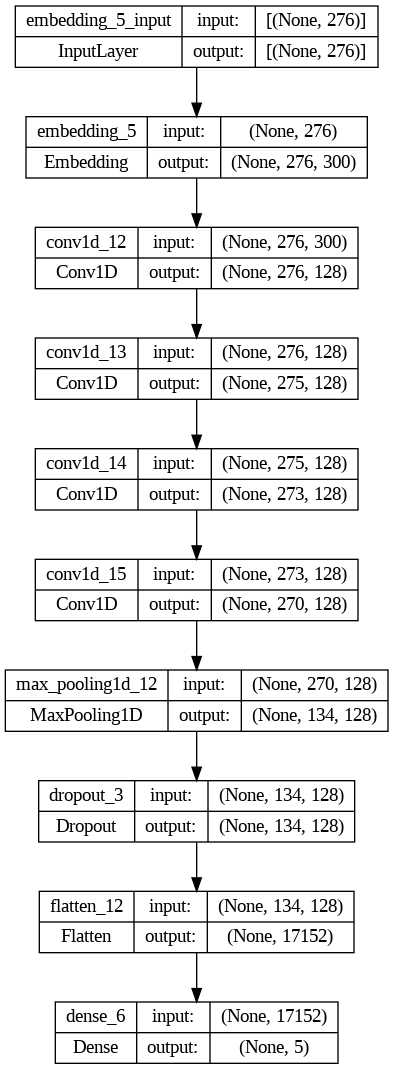

In [126]:
#print model
plot_model(model, show_shapes=True)

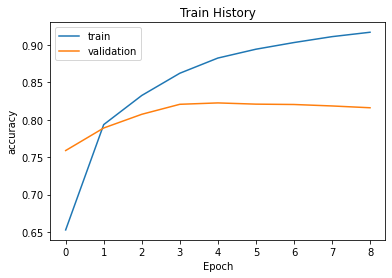

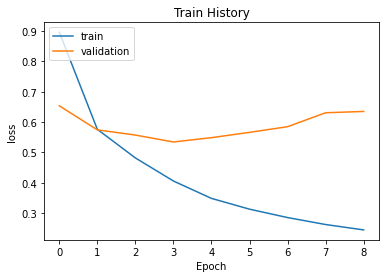

Accuracy on training data is:- 91.69493317604065 %
Loss 24.425378441810608
Accuracy on validation data is:- 81.60558938980103 %
Loss 63.48509192466736


In [127]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

def show_train_history(train_history,train,validation):
    plt.plot(train_history.history.history[train])
    plt.plot(train_history.history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

show_train_history(model,'accuracy','val_accuracy')
show_train_history(model,'loss','val_loss') 
acc = model.history.history['accuracy']
val_acc = model.history.history['val_accuracy']
loss = model.history.history['loss']
val_loss = model.history.history['val_loss']
print(f"Accuracy on training data is:- {acc[-1]*100} %")
print(f"Loss {loss[-1]*100}")
print(f"Accuracy on validation data is:- {val_acc[-1]*100} %")
print(f"Loss {val_loss[-1]*100}")

In [128]:
pred = np.argmax(model.predict(X_test), axis =1)
slabels=np.argmax(y_test, axis=1)
print("F1-score of Model:",f1_score(slabels,pred, average='macro'))
print(classification_report(slabels,pred))

609/609 [==============================] - 2s 3ms/step
F1-score of Model: 0.7725664041944678
              precision    recall  f1-score   support

           0       0.88      0.89      0.88      6711
           1       0.84      0.82      0.83      5939
           2       0.73      0.72      0.72      2661
           3       0.78      0.77      0.78      2648
           4       0.63      0.67      0.65      1499

    accuracy                           0.81     19458
   macro avg       0.77      0.77      0.77     19458
weighted avg       0.81      0.81      0.81     19458

